<a href="https://colab.research.google.com/github/ShekSingh/AlgorithmsPartOne/blob/master/Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Fibonacci (without Recursion)

P.S - We have a recursive formula, but no recusrion. 


In [ ]:
import array
def fib(n):
    a = array.array('i',(i for i in range(0,n)))
    a[0] = 0 # O(1)
    a[1] = 1 # O(1)
    # O(N)
    for i in range(2,n):
        a[i] = a[i-1] + a[i-2] # O(1)
    return a[n-1]       
fib(7)    

array('i', [0, 1, 1, 2, 3, 5, 8])


8

In [ ]:
#1. Fibonacci (Inefficient Recursion) - solving the same small problem multiple times

In [ ]:

def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return (fib(n-1) + fib(n-2))        

In [ ]:
fib(6)

8

#2: Longest Increasing Subsequence


In [ ]:
import array
def max_lis(arr):
    n = len(arr)
    #initialize with 1 since that is the min length of an increasing subsequence
    lis = array.array('i',(1 for i in range(n)))
  
    for i in range(1,n):
        lis[0] = 1
        for j in range(0,i-1):
            if ((arr[i]> arr[j]) and (lis[i] < lis[j] + 1)):
                lis[i] = lis[j]+1
    max = 1
    for k in range(0,n):
        if lis[k] > max:
            max = lis[k]

    return max


arr = array.array('i',(0 for i in range(8)))
arr[0] = 10
arr[1] = 22
arr[2] = 9
arr[3] = 33
arr[4] = 21
arr[5] = 50
arr[6] = 41
arr[7] = 60
max_lis(arr)

4

In [ ]:
arr[1]

22

#3: Longest Common Subsequence
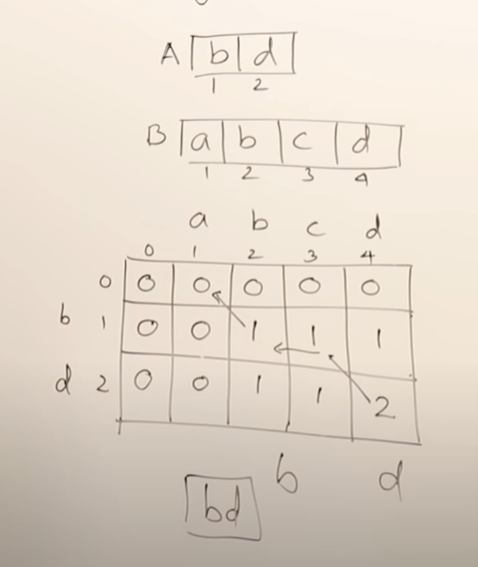

In [ ]:
import numpy as np
def max_lcs(s1, s2):
    # we need to consider the zeroes for first row and first column so adding 1 to boths lets
    s1_len = len(s1)
    s2_len = len(s2)
   
    lis = np.empty(shape=(s1_len,s2_len),  dtype=np.int8)
    lis.fill(0)
   
    #note start with 1
    for i in range(1, s1_len):
        for j in range(1,s2_len):
            if s1[i] == s2[j]:
                #take value of diagonally up
                lis[i,j] = 1 + lis[i-1,j-1]
            else:
                #take max of (value to the left, and value above)
                lis[i,j] = max(lis[i-1,j], lis[i,j-1])      
    print(lis)
    return lis[len(s1)-1,len(s2)-1]

s1 = np.chararray(3)
# need to start with empty string since we are using 1 based index so we need i=1 to point to b
s1[0] = ''
s1[1] = 'b'
s1[2] = 'd'

# need to start with empty string since we are using 1 based index so we need jc=1 to point to a
s2 = np.chararray(5)
s2[0] = ''
s2[1] = 'a'
s2[2] = 'b'
s2[3] = 'c'
s2[4] = 'd'
print(s1,s2)
max_lcs(s1,s2)


['' b'b' b'd'] ['' b'a' b'b' b'c' b'd']
[[0 0 0 0 0]
 [0 0 1 1 1]
 [0 0 1 1 2]]


2

#HW 1 Q1

1. Define Table Entries

Let T[i,j] be the length of the longest repeated subsequence, for string S of length n, 
in substrings S[i,...,n] and S[j,...,n]


2.Base Case

T[i,j] = 0 for all i<1 or j < 1 or i > n or j > n


2.Recurrence

T[i,j] = { 1 + T[i-1,j-1]   if s[i] == s[j]  and i != j

         max(T[1-j],T[i,j-1])  if s[i] != s[j] or i=j

}   for all 1 <= i <=n and 1<= j <= n


3.Pseudocode

T[.,.] = 0

for i = 1 -> n
    for j = 1 -> n
        if s[i] == s[j] and i != j then
            T[i,j] = 1 + T[i-1,j-1]
        else
            T[i,j] = max(T[i-1,j], T[i,j-1]    

return T[n,n]




4.  In order to compute the length of longest repeated subsequence in T[i,j] we need two loops to iterate over string S. With i controlling the outer loop and j controlling the innter most loop the worst case runtime complexity will be O(n^2).              

In [ ]:
import numpy as np
def max_lcs(s1):
    # we need to consider the zeroes for first row and first column so adding 1 to boths lets
    s1_len = len(s1)
   
    lis = np.empty(shape=(s1_len,s1_len),  dtype=np.int8)
    lis.fill(0)
    #note start with 1
    for i in range(1, s1_len):
        for j in range(1,s1_len):
            if (s1[i] == s1[j]) and (i != j):
                #take value of diagonally up
                lis[i,j] = 1 + lis[i-1,j-1]
            else:
                #take max of (value to the left, and value above)
                lis[i,j] = max(lis[i-1,j], lis[i,j-1])      
    print(lis)
    return lis[s1_len-1,s1_len-1]

s1 = np.chararray(5)
# need to start with empty string since we are using 1 based index so we need i=1 to point to b
s1[0] = ''
s1[1] = 'a'
s1[2] = 'b'
s1[3] = 'a'
s1[4] = 'a'
# s1[3] = 'a'


max_lcs(s1)

[[0 0 0 0 0]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 1 1 1 2]
 [0 1 1 2 2]]


2

#HW 1 Q2

In [ ]:
# import numpy as np

# def max_prod_sum(arr):
    
#     max_calc = 0
#     start_idx = 0
#     left_max = 0
#     for i in range(1,len(arr)-1):
#         # print("left :",(arr[i-1] * arr[i]) ,(arr[i-1] + arr[i]))
#         left_max = max((arr[i-1] * arr[i]) ,(arr[i-1] + arr[i]))
#         # print("right:",(arr[i-1] + arr[i]) ,(arr[i] + arr[i+1]))
#         right_max = max((arr[i-1] + arr[i]) ,(arr[i] + arr[i+1]))

#         if left_max > right_max:
#             max_calc = left_max
#             start_idx = i-1
#         else:
#             max_calc = right_max
#             start_idx = i

#         if      
#     print("throw",start_idx, start_idx+1)


# # arr = np.array([2,3,1,2])
# arr = np.array([5,2,2,2,1,2,2,3])
# #in case of index 5 where middle is 1 [2] 2 3, even though 1 X 2 is less then 2 X 2...we can't use the last 2 since 2 X 3 is greater than 2 X 2.
# max_prod_sum(arr)

1
10 4
3
4 2
5
2 4
6
4 6
17


In [ ]:
import numpy as np

def max_prod_sum(num_lst):
    sum = 0
    while (len(num_lst)):
        print(num_lst)
        overall_max = 0
        start_idx = 0
        for i in range(0,len(num_lst)-1):
            # print("left :",(arr[i-1] * arr[i]) ,(arr[i-1] + arr[i]))
            curr_max = max((num_lst[i] * num_lst[i+1]) ,(num_lst[i] + num_lst[i+1]))
        
            if curr_max > overall_max:
                overall_max = curr_max
                start_idx = i

        # if we accept negative number we can check for num_lst[0] > 0:
        print("throw",start_idx, start_idx+1)
        if len(num_lst) == 1: 
            print("mc",overall_max)
            sum = sum + num_lst[0]
            num_lst.pop(start_idx) 
        else:
            sum = sum + overall_max
            #pop the index and the one after it   
            num_lst.pop(start_idx)
            num_lst.pop(start_idx)

    print(sum)


# arr = np.array([2,3,1,2])
num_lst = [5,2,2,2,1,2,2,3]
#in case of index 5 where middle is 1 [2] 2 3, even though 1 X 2 is less then 2 X 2...we can't use the last 2 since 2 X 3 is greater than 2 X 2.
max_prod_sum(num_lst)


[5, 2, 2, 2, 1, 2, 2, 3]
throw 0 1
[2, 2, 1, 2, 2, 3]
throw 4 5
[2, 2, 1, 2]
throw 0 1
[1, 2]
throw 0 1
23


#Optimal Solution of HW1 Q2

1.Define Table Entries
Let T[i] is the largest neighbouring product sum of subarray A[i,....,n]


2.Base Case
T[i] = 0 for i > n 
T[i] = A[n] for i==n 


2.Recurrence

T[i,j] = { max (A[i] + T[i+1],  (A[i] . A[i+1]) + T[i+2])

}  for all 1 <= i < n 


3.Pseudocode

T[1,.., n+1] = 0
T[n] = A[n]

for i = n-1 -> 1
    T[i] = max (A[i] + T[i+1],  (A[i] . A[i+1]) + T[i+2])

return T[1]

4.  In order to compute the largest neighbouring product sum in T[i] we need one loop to iterate over A. With i controlling the only loop and saving the product sum in T, the worst case runtime complexity will be O(n).    

In [ ]:
import numpy as np

def max_prod_sum(num_lst):

    lnps = [0] * (len(num_lst)+1)
    n = len(num_lst) - 1
    # print(n)
    

    lnps[n] = num_lst[n]
    # print(lnps)
    for i in range(n-1,-1,-1):
        # print(i)
        # print("sum ", num_lst[i] + lnps[i+1])
        # print("mult ",(num_lst[i] * num_lst[i+1]) + lnps[i+2])
        lnps[i] = max((num_lst[i] + lnps[i+1]),((num_lst[i] * num_lst[i+1]) + lnps[i+2]))

    print(lnps[0])



num_lst = [-1,-2,-3,-4,-5,-6,-7,-8]
max_prod_sum(num_lst)

40


In [ ]:
for i in range(0,5):
    print(i)

0
1
2
3
4


#Kansack Problem without repeating items

In [ ]:
import numpy as np
V = [0,1,2,5,6]
Wt = [0,2,3,4,5]
B = 8
B = B + 1
n = len(Wt)


lst = np.empty(shape=(n,B),  dtype=np.int8)
lst.fill(0)

for i in range (0,n):
    for w in range(0,B):
        #w  ==0 then capacity of bag = 0 then 0 profit
        #i ==0 then no items are included then 0 profit
        if (i==0 or w==0):
            lst[i,w] = 0
        elif (Wt[i] <= w):
           # say if column value is w is 4 and then w[i]  = 2 then we take the max of  (value of that item i.e. V[i] + value of the largest item that can fit (from above col) 
           #in i.e. so value of weight 2 (from matrix), the profit of the last item 
         # (from row above it) whose weight can also fit in  ) 
             lst[i,w] = max(V[i]+ lst[i-1,(w-Wt[i])], lst[i-1,w])
        else:
      #if weight is more than max weight for that col then copy the values from above.
             lst[i,w] =  lst[i-1,w]  

print(lst)

print(lst[i,w])      

[[0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1]
 [0 0 1 2 2 3 3 3 3]
 [0 0 1 2 5 5 6 7 7]
 [0 0 1 2 5 6 6 7 8]]
8


#Knapsack with repeat 

In [ ]:
import numpy as np
V = [0,1,2,5,6]
Wt = [0,2,3,4,5]
B = 8
B = B + 1
n = len(Wt)


lst = np.empty(shape=(B),  dtype=np.int8)
lst.fill(0)
print(lst)
for i in range (0,n):
    for w in range(0,B):
        #w  ==0 then capacity of bag = 0 then 0 profit
        # i ==0 then no items are included then 0 profit
        # print(i,w,w-Wt[i],V[i])
        if (i==0 or w==0):
            lst[w] = 0
        # if   Wt[i] <= w => if current item can fit in the bag with w max weight
        # if value in current cell at lst[w] for weight w is less than the value of item at i + value of whatever amount of capacity is left from cell lst[(w-Wt[i])]
        elif (Wt[i] <= w) and (lst[w] < (V[i] + lst[(w-Wt[i])])):
            #  print("hi")
             lst[w] =  V[i] + lst[w-Wt[i]]

print(lst)

[0 0 0 0 0 0 0 0 0]
[ 0  0  1  2  5  6  6  7 10]


#Matrix Multiplication

In [ ]:
import numpy as np
import sys as sys
P = np.array([5,4,6,2,7])
# print(P)
# n = len(P)
m = np.empty(shape=(n,n),  dtype=np.int64)
m.fill(0)
# print(m)


# this loop controls the diff between row,col index of m, on the right side of center diagonal, to get smaller diagonals e.g. i-j = 1, i-j = 2, i-j = 3
for d in range(1,n-1):
    # print("d",d)
    #n-d becuase as we move towards smaller diagolans we will need to interate through less and less i. first till 3, then till 2 and then till 1 
    for i in range(1,n-d):
        j = i+d
        #reset min
        min = sys.maxsize
        # print("i  j",i,j)
        #cost (number of) scalar multiplications
        for k in range(i,j):
            # below is the formula lets break it down
            # say i=1, j=3 in m
            # then we are multiplying matrix A1 (dim = 5 X 4) , A2 (dim 4 X 6) , A3 (6 X 2)  (see P for position of dimension)
            # i = 1 and j = 3 then k only runs two iterations for k = 1 and k=2
            # lets see k = 1
                # m[i,k] = m[1,1] = 0 (in m we save calculations so that we can reuse)
                # m[k+1,j] = m[2,3] = 48
                 # (P[i-1] * P[k] * P[j]) = this is used to calcuate number of multiplications in this case it will be 5 * 4 * 2 = 40
            # lets see k = 2
            # we do the same for k= 2 like we did for k = 1 above then we take then min of k1 and k2 and save it in m[i,j]     
            q = m[i,k] + m[k+1,j] + (P[i-1] * P[k] * P[j])

            if q < min:
                min= q
        # print("=====================================================")
        # print(m[i,j],min)
        m[i,j] = min
print(m)
print("min number of scalar multiplications = ", m[1,n-1])        

[[  0   0   0   0   0]
 [  0   0 120  88 158]
 [  0   0   0  48 104]
 [  0   0   0   0  84]
 [  0   0   0   0   0]]
min number of scalar multiplications  158


# Single source shortest path - Bellman Ford (can take negative weights unlike Dijkstra's but can't take negative weight cycle unlike Floyd Warshall)

In [41]:
import numpy as np
import math
class Graph:

    def __init__(self, vertices):

        self.M = vertices   # Total number of vertices in the graph

        self.graph = []     # Array of edges



    # Add edges

    def add_edge(self, a, b, c):

        self.graph.append([a, b, c])

#vertices
V = 10
g= Graph(V)

g.add_edge(0, 1, 5)
g.add_edge(1, 2, 20)
g.add_edge(1, 5, 30)
g.add_edge(1, 6, 60)
g.add_edge(2, 3, 10)
g.add_edge(2, 4, 75)

g.add_edge(3, 2, -15)
g.add_edge(4, 9, 100)
g.add_edge(5, 6, 5)
g.add_edge(5, 8, 50)
g.add_edge(5, 4, 25)
g.add_edge(6, 7, -50)
g.add_edge(7, 8, -10)

# g.add_edge(0, 1, 2)
# g.add_edge(0, 2, 4)
# g.add_edge(1, 3, 2)
# g.add_edge(2, 4, 3)
# g.add_edge(2, 3, 4)
# g.add_edge(4, 3, -5)

E = len(g.graph)
print(g.graph)
print(E)

#array to track distance
D = np.empty(shape=V,  dtype=np.float64)
#source node
S = 0
for i in range(len(D)):
    D[i] = math.inf

D[S] = 0


for i in range(0,V-1):
    for edge in g.graph:
        # print("from ", edge[0] , " from cost in D" , D[edge[0]])
        # print("to ", edge[1] , " to cost in D" , D[edge[1]])
        # print(edge[2])

        u_idx = edge[0]
        v_idx = edge[1]
        u_v_cost = edge[2]
        #https://www.youtube.com/watch?v=obWXjtg0L64
        #if current cost of my source plus my source's cost to me is less than my_current cost then update mine with the addition of those two
        #if D[u_idx] is INF then we just don'e know how to get there YET, but we will soon after we go through all edges
        if (D[u_idx] + u_v_cost < D[v_idx]):
            D[v_idx] = D[u_idx] + u_v_cost
    print(D)
    #D is an array of distances from 

[[0, 1, 5], [1, 2, 20], [1, 5, 30], [1, 6, 60], [2, 3, 10], [2, 4, 75], [3, 2, -15], [4, 9, 100], [5, 6, 5], [5, 8, 50], [5, 4, 25], [6, 7, -50], [7, 8, -10]]
13
[  0.   5.  20.  35.  60.  35.  40. -10. -20. 200.]
[  0.   5.  15.  30.  60.  35.  40. -10. -20. 160.]
[  0.   5.  10.  25.  60.  35.  40. -10. -20. 160.]
[  0.   5.   5.  20.  60.  35.  40. -10. -20. 160.]
[  0.   5.   0.  15.  60.  35.  40. -10. -20. 160.]
[  0.   5.  -5.  10.  60.  35.  40. -10. -20. 160.]
[  0.   5. -10.   5.  60.  35.  40. -10. -20. 160.]
[  0.   5. -15.   0.  60.  35.  40. -10. -20. 160.]
[  0.   5. -20.  -5.  60.  35.  40. -10. -20. 160.]


In [37]:
# def shortest_path(graph, source):
#     # Initialize distances from the source to all other vertices as infinite
#     distances =  np.empty(shape=V,  dtype=np.float64)
#     distances[source] = 0

#     # Relax all edges |V| - 1 times
#     for _ in range(len(graph) - 1):
#         for u, v, w in graph.edges():
#             if distances[u] + w < distances[v]:
#                 distances[v] = distances[u] + w
#     return distances

# V = 10
# g = []

# g.append([1, 2, 20])
# g.append([1, 5, 30])
# g.append([1, 6, 60])
# g.append([2, 3, 10])
# g.append([2, 4, 75])

# g.append([3, 2, -15])
# g.append([4, 9, 100])
# g.append([5, 6, 5])
# g.append([5, 8, 50])
# g.append([5, 4, 25])
# g.append([6, 7, -50])
# g.append([7, 8, -10])

# for vertex in g:
#     print(vertex)

# shortest_path(g, 0)

# shortest path with atleast K edges

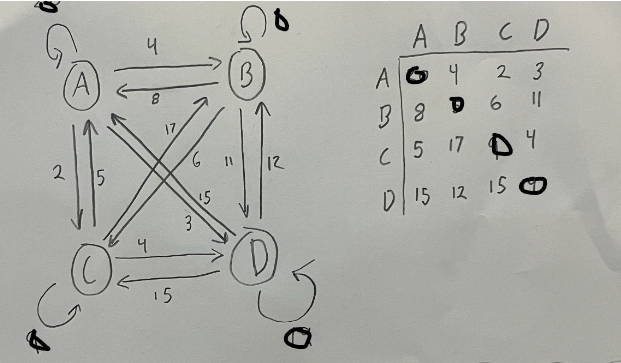

In [43]:
import numpy as np
import math

def shortest_path_k_edges(N,graph, u, v, minDays):
    # Initialize the 2D array dp with all elements set to infinity
    # except for the starting point which is set to 0
    inf = float('inf')

    #array to track distance
    D = np.empty(shape=(minDays+1,N),  dtype=np.float64)
    #source node
    S = 0
    for i in range(N):
        D[0,i] = math.inf

    D[0,S] = 0
    print(D)
    # Iterate through the number of edges (k)
    # for e in range(1, k+1):
    #     # Iterate through all nodes (i)
    #     print(np.array(dp))
    #     for i in range(n):
    #         # Iterate through all neighbors (j) of the current node (i)
    #         for j in range(n):
    #             if graph[i][j] != inf:
    #                 # Update the minimum cost of the current node (i)
    #                 # with the cost of the previous node (j) plus the weight of the edge (i, j)
    #                 dp[i][e] = min(dp[i][e], dp[j][e-1] + graph[j][i])
    # # Return the minimum cost of the end node
    # return dp[end][k]

graph = [[0,4,2,3],
        [8, 0, 6, 11],
        [5, 17, 0, 4],
        [15, 12, 15, 0]]

shortest_path_k_edges(4,graph,3,0,2)            

[[ 0. inf inf inf]
 [12. inf inf 15.]
 [inf  0.  0. inf]]


In [32]:
import numpy as np
import math

def shortest_path_k_edges(graph, start, end, k):
    # Initialize the 2D array dp with all elements set to infinity
    # except for the starting point which is set to 0
    inf = float('inf')
    n = len(graph)
    dp = [[inf for _ in range(k+1)] for _ in range(n)]
    dp[start][0] = 0
    print(np.array(dp))
    # Iterate through the number of edges (k)
    for e in range(1, k+1):
        # Iterate through all nodes (i)
        print(np.array(dp))
        for i in range(n):
            # Iterate through all neighbors (j) of the current node (i)
            for j in range(n):
                if graph[i][j] != inf:
                    # Update the minimum cost of the current node (i)
                    # with the cost of the previous node (j) plus the weight of the edge (i, j)
                    dp[i][e] = min(dp[i][e], dp[j][e-1] + graph[j][i])
    # Return the minimum cost of the end node
    return dp[end][k]

graph = [[0,4,2,3],
        [8, 0, 6, 11],
        [5, 17, 0, 4],
        [15, 12, 15, 0]]

shortest_path_k_edges(graph,3,0,2)            

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [ 0. inf inf]]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [ 0. inf inf]]
[[inf 15. inf]
 [inf 12. inf]
 [inf 15. inf]
 [ 0.  0. inf]]


15

[[0, inf], [inf, inf], [inf, inf], [inf, inf]]


2